In [8]:
import matplotlib.pyplot as plt
import numpy as np
# import networkx as nx
import os
import pandas as pd
import time
import json

In [4]:
path = "../outputs"
f = "path_21946_infos.json"

In [17]:
with open(os.path.join(path,f),"r") as infile:
    infos = json.load(infile)

In [ ]:
plt.figure(figsize=(20,10))
for i in range(len(infos["pipeline"])):
    print(infos["pipeline"][i])
    costs = np.array(infos["data"][i]["edgecosts"])
    path = np.array(infos["data"][i]["path_cells"])
    plt.plot(path[:,0], path[:,1], label=i)
    print(np.sum(costs, axis=0))
    print(infos["data"][i]["time_logs"])
plt.legend()
plt.show()

In [2]:
path = "../outputs"

In [27]:
times = pd.read_csv(os.path.join(path, "watershed_comp/time_tests.csv")) # "time_tests_compare1.csv"))

## Scale 2 comparison

In [18]:
direct = times[times["id"].str.contains("direct")]

In [19]:
overall_times = times[times["time_pipeline"]!=0]

In [8]:
# out_costs = np.array([eval(c) for c in times["cost_sum"]])

In [9]:
times.columns

Index(['id', 'scale', 'graphtype', 'pipeline', 'n_nodes', 'n_edges',
       'add_nodes_time', 'add_edge_time', 'shortest_path_time', 'sp_tree_time',
       'ksp_time', 'pareto_time', 'downsample_time', 'cult_costs', 'hum_costs',
       'plan_costs', 'tech_costs', 'cost_sum', 'time_pipeline'],
      dtype='object')

In [30]:
agg_dict = {"n_edges":"max", "add_edge_time":"sum", "shortest_path_time":"sum","downsample_time":"sum", "cost_sum":"min", "time_pipeline":"max"}
#  "pareto_time":"sum", "ksp_time":"sum", "sp_tree_time":"sum",
max_edges = times.groupby("id").agg(agg_dict).reset_index()

In [32]:
# times.groupby('id')['dist'].apply(list)
max_edges["cost_sum"] = list(times.groupby('id')['cost_sum'].apply(list))
# max_edges["factos"] = list(times.groupby('id')['sample_factor'].apply(list))

In [22]:
df_plot = times[["id", "cost_sum", ]]

In [ ]:
ax = max_edges.plot.bar(x='id', y='n_edges', rot=0, figsize=(15,5))


## Bar plot of costs

In [24]:
def plot_comparison(var):
    costs = times.groupby('id')[var].apply(list)
    co = np.array(costs)
    max_len = max([len(c) for c in co])
    new_list = [l + [l[-1] for _ in range(max_len-len(l))] for l in co]
    new_df = pd.DataFrame(data = new_list, columns=[str(i) for i in range(max_len)])
    new_df["id"] = np.unique(times["id"])
    ax = new_df.plot.bar(x='id', figsize=(15,5))

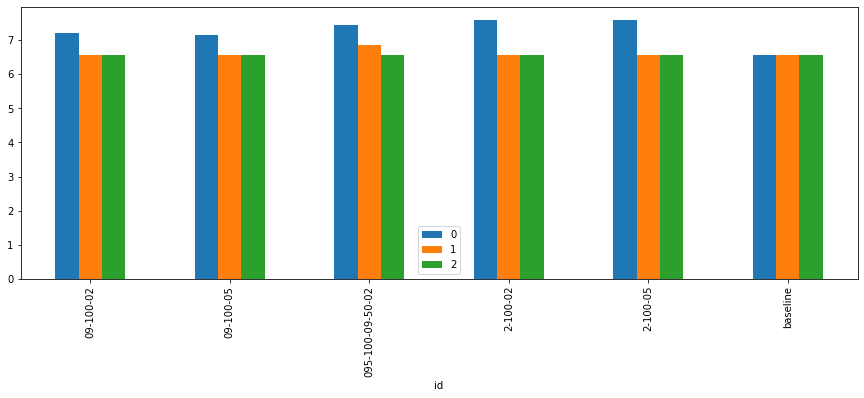

In [25]:
plot_comparison("cost_sum")

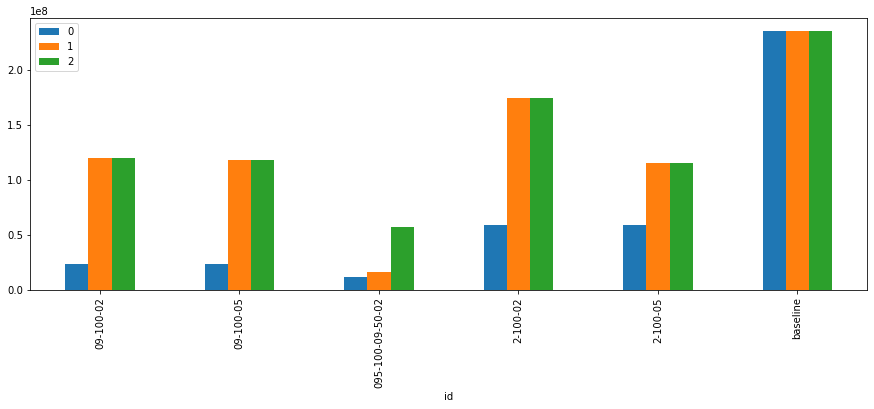

In [26]:
plot_comparison("n_edges")

## Check outputs qualitatively:

In [ ]:
instance_path = "../data/data_dump_1.dat"
with open(instance_path, "rb") as infile:
    data = pickle.load(infile)
(instance, instance_corr, start_inds, dest_inds) = data.data

In [ ]:
paths = []
for json_file in ["path_norm-1-direct_infos.json", "path_norm_1_pipe_infos.json", "path_random_1_pipe_infos.json"]:
    with open("../outputs/"+json_file, "r") as infile:
        infos = json.load(infile)
        print(json_file)
        costs = infos["data"][-1]["edgecosts"]
        print(np.sum(np.array(costs), axis=0), np.sum(np.array(costs)))
        paths.append(np.array(infos["data"][-1]["path_cells"]))

### Double check costs

In [ ]:
for i, path in enumerate(paths):
    costs = []
    for p in path:
        cost = instance[:, p[0], p[1]]
        costs.append(cost)
    print(np.sum(np.array(costs), axis=0))

### Color paths in image

In [ ]:
expanded = np.expand_dims(instance_corr*instance[2], axis=2)
expanded = np.tile(expanded, (1, 1, 3)) 
buffer = 2
for i, path in enumerate(paths[:3]):
    col = np.zeros(3)
    col[i] = 1
    for p in path:
        x = p[0]
        y = p[1]
        expanded[x - buffer:x + buffer + 1,
                 y - buffer:y + buffer + 1]  = col

In [ ]:
red = normal

green = norm pipe

blue = random pipe

In [ ]:
plt.figure(figsize=(10,20))
plt.imshow(np.swapaxes(expanded, 1, 0))

### Time tests

In [ ]:
# min and argmin at same time
def original_app(A):
    min_idx = np.argmin(A,axis=0)
    min_val = np.amin(A,axis=0)
    return min_idx, min_val

def proposed_app(A):
    min_idx = np.argmin(A,axis=0)
    min_val = np.take_along_axis(A, min_idx[None,:,:], axis=0)[0,:,:]
    return min_idx, min_val


A = np.random.randint(0,99,(40,400,500))
%timeit original_app(A)
%timeit proposed_app(A)

## Check average distance on out path

2
23.44796037531516 min: 16.1245154965971
2
23.88907334236418 min: 16.492422502470642


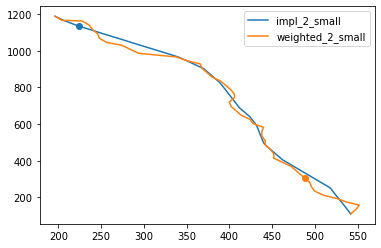

In [19]:
path_in = "../../outputs"
found_paths = []
for f in ["impl_2_small", "weighted_2_small"]:
    with open(os.path.join(path_in,f+"_infos.json"),"r") as infile:
        infos = json.load(infile)
    # print(infos["data"][0]["path_cells"])
    print(infos["scale"])
    found_paths.append(infos["data"][0]["path_cells"])
    # get path
    path = np.asarray(infos["data"][0]["path_cells"])
    # plot
    plt.plot(path[:,0], path[:,1], label=f)
    # get dists
    dists = []
    for p in range(len(path)-1):
         dists.append(np.linalg.norm(path[p]-path[p+1]))
    print(np.mean(dists), "min:", np.min(dists))
    a = np.where(np.array(dists)<17)
    plt.scatter(path[a,0], path[a,1])
plt.legend()
plt.show()

In [ ]:
for path in found_paths:
    path = np.asarray(path)
    # plt.plot(path[:,0], path[:,1])
    dists = []
    for p in range(len(path)-1):
         dists.append(np.linalg.norm(path[p]-path[p+1]))
    # print(dists)
    print("smaller 17:", np.where(np.array(dists)<17))
    plt.hist(dists)
    plt.show()

# Evaluate non-normalized costs

In [17]:
import os
import pickle
import rasterio
from power_planner.utils.utils import normalize, bresenham_line, discrete_angle_costs, angle
from power_planner.utils.utils_costs import CostUtils
from power_planner.utils.utils_constraints import ConstraintUtils

In [49]:
layer_path = "../../data/instance_de.nosync/tif_layers" # belgium.nosync/tif_layers"
csv_path = "../../data/instance_de.nosync/layer_weights.csv" # /belgium.nosync/layer_weights.csv"
json_path = "../../outputs/de_presentation/sensitivity_tuples" # paths_compare"


In [11]:
def get_raw_data(layer_path, csv_path, scenario=1):
    layer_list = pd.read_csv(csv_path).dropna()
    # layer_list = layer_csv[layer_csv["weight_" + str(scenario)] != "Forbidden"]
    layer_arr = []
    layer_weights, layer_names, layer_classes = [], [], []
    forb_arr = []
    for i, row in layer_list.iterrows():
        file_path = os.path.join(
            layer_path, row["Layer Name"] + ".tif"
        )
        if os.path.exists(file_path):
            with rasterio.open(file_path, 'r') as ds:
                arr = ds.read()[0]
            # binarize single tif layer so it can be weighted
            # -1  because in tifs the costly areas are black
            if len(arr)==3078:
                arr = arr[:3078, :3724]
            # add to hard constraints or general instance
            if row["weight_" + str(scenario)]=="Forbidden":
                constraint = (arr.astype(int) != 1).astype(int)
                forb_arr.append(constraint)
                print(constraint.shape)
            else:
                costs = (arr==1).astype(int)
                # costs = np.absolute(normalize(arr) - 1)
                layer_arr.append(costs)
                layer_weights.append(int(row["weight_" + str(scenario)])*int(row["category_weight_" + str(scenario)]))
                layer_classes.append(row["class"])
                layer_names.append(row["Layer Name"]) # ["Corresponding Name"])
        else:
            print("file not found:", row["Layer Name"])
    df = pd.DataFrame()
    df["weights"] = layer_weights
    df["arr_inds"] = [i for i in range(len(layer_arr))]
    df["class"] = layer_classes
    df["layer"] = layer_names
    layer_arr = np.asarray(layer_arr)
    if len(forb_arr)==0:
        forb_arr = np.ones(layer_arr.shape)
    return np.swapaxes(layer_arr,2,1), np.swapaxes(np.array(forb_arr), 2,1), df

### Display hard constraints

In [9]:
def display_paths(forbidden_arr, paths):
    plt.figure(figsize=(20,10))
    plt.imshow(np.all(forbidden_arr.astype(int), axis=0), cmap=plt.get_cmap("gist_gray"))
    plt.colorbar()
    for path in paths:
        plt.scatter(path[:,1], path[:,0])
    plt.show()

#### Check if forbidden layers used

In [10]:
def assert_forbidden(forbidden_arr, paths):
    for l,f in enumerate(forbidden_arr):
        for (i,j) in path:
            assert f[i,j] >0, f"forbidden: layer {l} cell {i} {j}"

def assert_forbidden_inst(forbidden_arr, path):
    for (i,j) in path:
        assert forbidden_arr[i,j] >0, f"forbidden: cell {i} {j}"

### Compute absolute costs

#### Vertex costs

In [12]:
def pylon_costs(layer_arr, path):
    pylons = []
    for l in range(len(layer_arr)):
        pylons.append(np.sum([layer_arr[l,i,j] for (i,j) in path]))
    return pylons

#### Cable costs

In [13]:
def cable_costs(layer_arr, path):
    edge_costs = []
    path_int = path.astype(int)
    for l in range(len(layer_arr)): 
        path_edges = []
        for p in range(len(path)-1):
            # edge costs
            line = bresenham_line(
                    path[p][0], path[p][1], path[p + 1][0], path[p + 1][1]
                )
            path_edges.extend(line[1:-1])
        edge_costs.append(np.sum([layer_arr[l,i,j] for (i,j) in path_edges]))
    return edge_costs

def edge_costs(layer_arr, path):
    edge_costs = []
    path_int = path.astype(int)
    for l in range(len(layer_arr)): 
        path_edges = []
        for p in range(len(path)-1):
            # get connection line between two paths
            line = bresenham_line(
                    path[p][0], path[p][1], path[p + 1][0], path[p + 1][1]
                )
            # take the mean of each segment
            path_edges.append(np.mean([layer_arr[l,i,j] for (i,j) in line[1:-1]]))
        edge_costs.append(np.sum(path_edges))
    return edge_costs

#### Angle costs

In [14]:
# angle costs
def angle_costs(path):
    angle_costs = []
    for p in range(len(path)-2):
        vec1 = path[p + 1] - path[p]
        vec2 = path[p + 2] - path[p + 1]
        angle_costs.append(angle(vec1, vec2))
    sum_angle = np.sum(angle_costs)
    return round(sum_angle, 2)

### Normalized costs

In [8]:
from power_planner.utils.utils import normalize

In [12]:
normed_per_class = []
for class_name, df_grouped in df.groupby(["class"]):
    layer_inds = df_grouped["arr_inds"].astype(int)
    relevant_layers = arr[layer_inds]
    group_weights = df_grouped["weights"].values.astype("float")
    weighted_layers = np.sum(np.array([relevant_layers[i] * group_weights[i] for i in range(len(group_weights))]), axis=0)
    normed_per_class.append(normalize(weighted_layers))
normed_per_class = np.asarray(normed_per_class)


In [13]:
with open("../data/belgium_dump_1.dat", "rb") as infile:
    data = pickle.load(infile)
    (instance, instance_corr, start_inds, dest_inds) = data.data

In [34]:
start_inds

array([542, 111])

In [15]:
instance.shape, normed_per_class.shape

((4, 739, 1300), (4, 1511, 1313))

# Start analysis

### Get layers and weights

In [18]:
arr, forb, df = get_raw_data(layer_path, csv_path)

(3078, 3724)
(3078, 3724)
(3078, 3724)


In [19]:
print(arr.shape, forb.shape)
df

(46, 3724, 3078) (3, 3724, 3078)


,weights,arr_inds,class,layer
0,36,0,Siedlungswesen,I_1111_Wohnumfeldschutz
1,24,1,Siedlungswesen,I_1121_Einschraenkung_oertl_Entwicklungsabsichten
2,12,2,Siedlungswesen,I_1123_Versorgungsflaechen_Bestand
3,12,3,Siedlungswesen,I_1124_Entsorgungsanlagen
4,12,4,Siedlungswesen,I_1125_Sondergebiete_EKZ_PV
5,24,5,Erholung und Tourismus,I_1211_Sondergebiete_Erholung
6,16,6,Erholung und Tourismus,I_1212_Sondergebiete_Erholung_200m
7,16,7,Erholung und Tourismus,I_1213_Freizeit_regionale_Bedeutung
8,30,8,Natur und Landschaft,I_1311_Landschaftl_Vorbehaltsgebiet
9,30,9,Natur und Landschaft,I_1313_Regionaler_Gruenzug


### Get output path

In [32]:
# read in ksp from one file
with open(os.path.join(json_path, "chinst_scale2_scen1_a4_path_orig.json"), "r") as infile:
    b_path = json.load(infile)
path_list = [np.asarray(p) for p in b_path]
json_names = ["ksp_"+str(i) for i in range(len(path_list))]

In [19]:
# read in several files
json_names = ["ch_inst_test_orig.json"]
# ["impl_0e_3a.json", "impl_2e_2a.json", "impl_3e_0a.json", "impl_parcel_2e_2a.json"]
# ["impl_lg.json", "normal.json",  "impl_5e_1a.json"] # "edge_cost_2_orig.json" - does not work because scale 2 -> forbidden areas (can still take it but will give assertion error)
path_list = []
for j_name in json_names:
    with open(os.path.join(json_path, j_name), "r") as infile:
        path_list.append(np.array(json.load(infile)[0]))
print(f"loaded {len(path_list)} paths")

loaded 1 paths


#### New version: from csv files

In [51]:
json_names = ["de_new_e5_d70_de_0.csv","de_new_e5_d70_de_1.csv",  "de_new_e5_d70_de_3.csv"]
json_names = ["sensitivity_de-I_1422_Wald_ohne_Bedeutung-I_2713_Landschaftspraegende_Denkmaeler_inkl_3000m.csv", "sensitivity_debaseline.csv"]
# ["laplace_e3_d80de_0.csv", "fast_e5_d70_de_1.csv", "fast_e5_d70_de_2.csv"]
path_list = []
for csv in json_names:
    path_arr = np.asarray(pd.read_csv(os.path.join(json_path, csv))[["X_raw", "Y_raw"]]).astype(int)
    path_list.append(path_arr)

#### From json with path list

In [17]:
with open("test_paths.json", "r") as outfile:
    path_list = json.load(outfile)
json_names = ["Normal LCP", "Angle-cost LCP"]
path_list = [np.asarray(path) for path in path_list]

### Plot

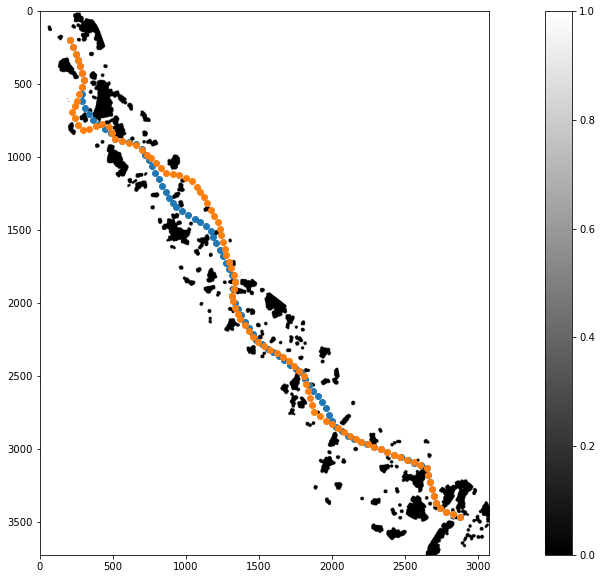

In [52]:
display_paths(forb, path_list)

In [53]:
for path in path_list:
    assert_forbidden(forb, path)
    # path2 = np.array(path)-shift_to_origin
    # assert_forbidden_inst(instance_corr, path2)

AssertionError: forbidden: layer 0 cell 1904 1326

In [54]:
results_df = df.copy()
angle_dict = {"weights":0,"arr_inds":"-", "class":"ANGLE", "layer":"Sum of angles (radial)"}
for name, path in zip(json_names,path_list):
    results_df[(name.split(".")[0], "pylon_cost")] = pylon_costs(arr, path)
    results_df[(name.split(".")[0], "cable_costs")] = cable_costs(arr, path)
    results_df[(name.split(".")[0], "edge_costs")] = edge_costs(arr,path)
    angle_dict[(name.split(".")[0], "edge_costs")] = angle_costs(path)
    angle_dict[(name.split(".")[0], "cable_costs")] = angle_costs(path)
    angle_dict[(name.split(".")[0], "pylon_cost")] = angle_costs(path)
# add angles
print(angle_dict)
results_df.loc[-1] = angle_dict

{'weights': 0, 'arr_inds': '-', 'class': 'ANGLE', 'layer': 'Sum of angles (radial)', ('sensitivity_de-I_1422_Wald_ohne_Bedeutung-I_2713_Landschaftspraegende_Denkmaeler_inkl_3000m', 'edge_costs'): 10.46, ('sensitivity_de-I_1422_Wald_ohne_Bedeutung-I_2713_Landschaftspraegende_Denkmaeler_inkl_3000m', 'cable_costs'): 10.46, ('sensitivity_de-I_1422_Wald_ohne_Bedeutung-I_2713_Landschaftspraegende_Denkmaeler_inkl_3000m', 'pylon_cost'): 10.46, ('sensitivity_debaseline', 'edge_costs'): 13.93, ('sensitivity_debaseline', 'cable_costs'): 13.93, ('sensitivity_debaseline', 'pylon_cost'): 13.93}


In [55]:
# results_df[(results_df[[("impl_0e_3a", "cable_costs"),("impl_2e_2a", "cable_costs"),("impl_3e_0a", "cable_costs")]].T != 0).any()].drop(columns=["arr_inds"])
results_df

,weights,arr_inds,class,layer,"(sensitivity_de-I_1422_Wald_ohne_Bedeutung-I_2713_Landschaftspraegende_Denkmaeler_inkl_3000m, pylon_cost)","(sensitivity_de-I_1422_Wald_ohne_Bedeutung-I_2713_Landschaftspraegende_Denkmaeler_inkl_3000m, cable_costs)","(sensitivity_de-I_1422_Wald_ohne_Bedeutung-I_2713_Landschaftspraegende_Denkmaeler_inkl_3000m, edge_costs)","(sensitivity_debaseline, pylon_cost)","(sensitivity_debaseline, cable_costs)","(sensitivity_debaseline, edge_costs)"
0,36,0,Siedlungswesen,I_1111_Wohnumfeldschutz,4.00,307.00,7.139839,2.00,284.00,6.675291
1,24,1,Siedlungswesen,I_1121_Einschraenkung_oertl_Entwicklungsabsichten,4.00,230.00,5.524496,4.00,198.00,4.679803
2,12,2,Siedlungswesen,I_1123_Versorgungsflaechen_Bestand,2.00,22.00,0.502326,2.00,22.00,0.502326
3,12,3,Siedlungswesen,I_1124_Entsorgungsanlagen,0.00,0.00,0.000000,0.00,0.00,0.000000
4,12,4,Siedlungswesen,I_1125_Sondergebiete_EKZ_PV,0.00,0.00,0.000000,0.00,8.00,0.205128
5,24,5,Erholung und Tourismus,I_1211_Sondergebiete_Erholung,0.00,0.00,0.000000,0.00,0.00,0.000000
6,16,6,Erholung und Tourismus,I_1212_Sondergebiete_Erholung_200m,0.00,0.00,0.000000,0.00,0.00,0.000000
7,16,7,Erholung und Tourismus,I_1213_Freizeit_regionale_Bedeutung,0.00,0.00,0.000000,0.00,0.00,0.000000
8,30,8,Natur und Landschaft,I_1311_Landschaftl_Vorbehaltsgebiet,5.00,366.00,8.484895,2.00,192.00,4.280230
9,30,9,Natur und Landschaft,I_1313_Regionaler_Gruenzug,0.00,61.00,1.350804,0.00,58.00,1.326049


In [56]:
class_df = pd.DataFrame()

weighted_pylon_costs, weighted_edge_costs = [], []
summed_pylon_costs, summed_edge_costs = [], [] 
class_df[("class", "", "")] = [c for (c,_) in results_df.groupby(["class"]) if c!="ANGLE"]
# iterate over columns
for j_name in json_names:
    name = j_name.split(".")[0]
    for cost in ["edge_costs", "pylon_cost", "cable_costs"]: 
        # consider groups
        weighted_results, abs_results = [], []
        for class_name, df_grouped in results_df.groupby(["class"]):
            if class_name=="ANGLE":
                continue
            # print(class_name, df_grouped["weights"])
            group_weights = np.array(df_grouped["weights"]).astype(int)
            normed_weights = group_weights/np.sum(group_weights)
            # print(normed_weights, class_name, df_grouped["weights"])
            w = normed_weights * np.array(df_grouped[(name, cost)].values)
            weighted_results.append(round(np.sum(w),3))
            abs_results.append(np.sum(df_grouped[(name, cost)].values))
        class_df[(name, cost, "absolute")] = abs_results
        class_df[(name, cost, "weighted")] = weighted_results
class_df.columns = pd.MultiIndex.from_tuples(class_df.columns)
class_df

class  \
                                               
                                               
0                          Boden und Flaeche   
1                                 Buendelung   
2                     Erholung und Tourismus   
3                  Land- und Forstwirtschaft   
4                                 Landschaft   
5                             Luft und Klima   
6          Mensch und menschliche Gesundheit   
7                       Natur und Landschaft   
8                          Rohstoffgewinnung   
9                             Siedlungswesen   
10     Tiere, Pflanzen, biologische Vielfalt   
11                                    Wasser   
12                          Wasserwirtschaft   
13  kulturelles Erbe und sonstige Sachgaeter   

   sensitivity_de-I_1422_Wald_ohne_Bedeutung-I_2713_Landschaftspraegende_Denkmaeler_inkl_3000m  \
                                                                                    edge_costs   
                                                                                      absolute   
0                                            2.793229                                            
1                                           21.091279                                            
2                                            0.000000                                            
3                                           66.330685                                            
4                                            6.994952                                            
5                                            4.835013                                            
6                                            0.000000                                            
7                                            9.835699                                            
8                                            1.669439                                            
9                                           13.166661                                            
10                                          10.034817                                            
11                                           5.962830                                            
12                                          11.730266                                            
13                                          45.430121                                            

                                                      sensitivity_debaseline  \
            pylon_cost          cable_costs                       edge_costs   
   weighted   absolute weighted    absolute  weighted               absolute   
0     0.669        1.0    0.100       117.0    28.500               3.374051   
1     7.030       29.0    9.667       933.0   311.000              26.741910   
2     0.000        0.0    0.000         0.0     0.000               0.000000   
3     7.343       50.0    5.143      2744.0   305.714              71.333362   
4     1.999        6.0    1.714       312.0    89.143               7.202650   
5     4.835        2.0    2.000       195.0   195.000               4.289584   
6     0.000        0.0    0.000         0.0     0.000               0.000000   
7     4.918        5.0    2.500       427.0   213.500               5.606280   
8     0.626        1.0    0.375        65.0    24.375               3.049877   
9     3.297       10.0    2.200       559.0   140.300              12.062548   
10    0.331       10.0    0.241       433.0    13.655               7.593194   
11    1.491        5.0    1.250       270.0    67.500               7.511849   
12    7.544       11.0    7.333       523.0   335.667              14.396588   
13   29.314       46.0   30.000      1862.0  1198.667              36.330618   

                                                      
            pylon_cost          cable_costs           
   weighted   absolute weighted    absolute weighted  
0     0.765        2.0    0.4

In [57]:
for column in class_df.columns:
    if "class" in column or "absolute" in column:
        continue
    vals = class_df[column].values
    print(column, np.sum(vals*np.array([0.28571429, 0.35714286, 0.14285714, 0.21428571])))
# (['angle', 'cultural', 'human', 'planning', 'technical'],
# array([0.        , 0.28571429, 0.35714286, 0.14285714, 0.21428571]))

ValueError: operands could not be broadcast together with shapes (14,) (4,) 

## Plotting

In [58]:
cab_cost_cols = [(name.split(".")[0], "pylon_cost") for name in json_names]

In [59]:
test_df = results_df.copy().set_index("layer")[cab_cost_cols]

In [60]:
test_weights = results_df.copy().set_index("layer")[(test_df.T != 0).any()]["weights"]
test_df = test_df[(test_df.T != 0).any()]

In [61]:
assert len(test_weights)==len(test_df)

In [62]:
test_weights.loc["Sum of angles (radial)"] = np.max(test_weights.values)

In [63]:
# normed_weighted = (test_weights.values.astype(int) +5)/10
w_vals = test_weights.values.astype(int)
normed_weighted = (w_vals - np.min(w_vals))/(np.max(w_vals)- np.min(w_vals))
rgbs = [(np.clip(n+0.4,0,1),np.clip(1-n+0.4, 0,1),0.2) for n in normed_weighted]

In [64]:
# BELGIUM:
replace_name_dict = {"Sector Plan - Landscape Interest Value": "Landscape",
                    "Mostly Crop with Vegetation": "Crop", "Perimeters of scenic view": "Scenic view",
                    "Land Use - Linear Elements": "Linear land use", 
                     "Land Use - Punctual Elements": "Punctual land use", 
                    "Area Economic Reconversion": "Economic Reconversion",
                    "General Rules of Buildings in Rural Areas": "Buildings (rural areas)",
                    "Modified Infrastructure Project": "Infrastructure project"}
# DE:
replace_name_dict = {"I_1111_Wohnumfeldschutz": "Wohnumfeld", 
                     "I_1121_Einschraenkung_oertl_Entwicklungsabsichten": "Oertl. Entwicklungsabsichten",
                    "I_1123_Versorgungsflaechen_Bestand":"Versorgungsflaechen",
                    "I_1411_Guenstige_landwirtschaftl_Flaechen": "Langdwirtschaftl Flaechen",
                    "I_1422_Wald_ohne_Bedeutung": "Wald", 
                     "I_1611_Vorranggebiet_Wasserversorgung":"Wasserversorgung",
                    "I_1713_Vorbehaltsgebiet_Bodenschaetze":"Bodenschaetze",
                    "I_1812_Freileitungen":"Freileitungen",
                    "I_1812_Strassen_ueberregional": "Strassen ueberregional",
                    "I_2214_VS_5000m":"VS 5000m", "I_2224_Gesetzl_geschuetzte_Biotope": "Biotope",
                    "I_2312_Moore":"Moore", "I_2321_Altlasten":"Altlasten", 
                     "I_2411_Wasserschutzgebiet_Zone1_2_3": "Wasserschutzgebiet (1-3)",
                    "I_2511_Wald_Bedeutung_Klimaschutz":"Wald (Klimaschutz)",
                    "I_2711_Bodendenkmaeler": "Bodendenkmaeler",
                    "I_2713_Landschaftspraegende_Denkmaeler_inkl_3000m": "Denkmaeler",
                    "I_2611_Landschaftsbildeinheit_sehr_und_hohe_Bedeutung": "Landschaftsbildeinheit",
                    "Sum of angles (radial)": "Angles", 
                    "I_1311_Landschaftl_Vorbehaltsgebiet": "Landschaftl. Vorbehaltsgebiet"}

In [65]:
test_df = test_df.rename(index=replace_name_dict)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


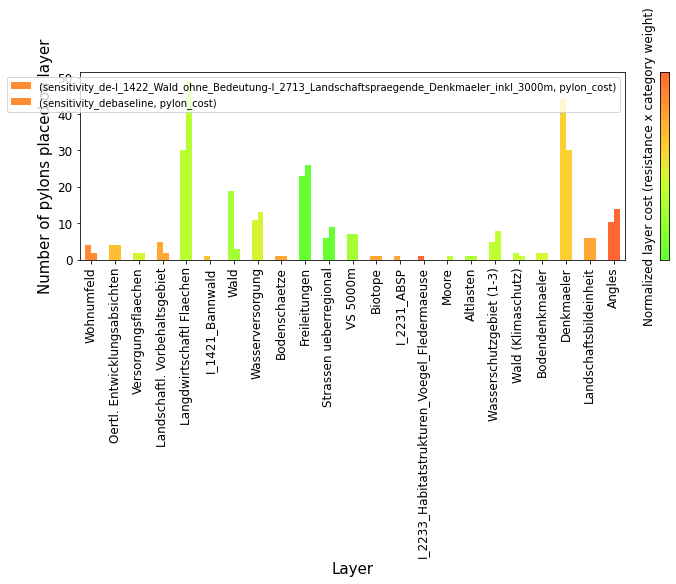

In [66]:
fig1, axs = plt.subplots(1, 2, figsize=(11,8), gridspec_kw={'width_ratios':[6,1]})
# fig, axs = plt.subplots(1, n_crit+1, figsize=(25, 15), gridspec_kw={'width_ratios': [9.5 for _ in range(n_crit)] +[1]})


    
test_df.plot.bar(ax = axs[0], rot=90, color=[rgbs, rgbs], fontsize=12)
axs[0].set_xlabel("Layer", fontsize=15)
axs[0].set_ylabel("Number of pylons placed on layer", fontsize=15)
plt.gcf().subplots_adjust(bottom=0.5)

arr_colorbar = np.zeros((39,2,3))
for i in range(39):
    arr_colorbar[i,:] = [i/39+0.4, 1-i/39+0.4, 0.2]
axs[1].imshow(arr_colorbar, origin="lower")
# axs[1].yaxis.tick_right()
# axs[j+1].yaxis.label_right()
# axs[1].set_yticklabels(np.around(np.arange(1.1,-0.1, 0.1),1))
axs[1].set_ylabel('Normalized layer cost (resistance x category weight)', fontsize=12)
axs[1].set_xticks([])
axs[1].set_yticks([])

plt.tight_layout()
plt.savefig("../../figure/abs_cost_de_leftout.png")


## QGIS preparation

In [471]:
SCALE_PARAM = 1
IOPATH = "../../data/belgium.nosync/data_dump_orig_" + str(SCALE_PARAM) + ".dat"
with open(IOPATH, "rb") as infile:
    data = pickle.load(infile)

In [475]:
for name, path in zip(json_names, path_list):
    coordinates = [data.transform_matrix * p for p in path]
    df = pd.DataFrame(np.asarray(coordinates), columns=["X", "Y"])
    out_path = os.path.join(json_path, name.split(".")[0])
    df.to_csv(out_path + "_coords.csv", index=False)

## Pylon - layer matrix

In [107]:
# first compute coordinates of pylons and cables
def path_to_edge_coords(path):
    is_pylon = []
    path_coords = []
    for p in range(len(path)-1):
        # add current pylon
        path_coords.append(path[p])
        is_pylon.append(1)
        # add cable
        line = bresenham_line(
                    path[p][0], path[p][1], path[p + 1][0], path[p + 1][1]
                )[1:-1]
        for l in line:
            path_coords.append(l)
            is_pylon.append(0)
    path_coords.append(path[-1])
    is_pylon.append(1)
    return path_coords, is_pylon
# plt.plot(np.array(path_coords)[:,0], np.array(path_coords)[:,1])

def pathline_to_matrix(arr, path_coords, is_pylon):
    out_matrix = np.zeros((len(arr),len(is_pylon)))
    is_pylon_helper = np.array(is_pylon)+1
    for i in range(len(arr)):
        count = 0
        for (m,n), is_py in zip(path_coords, is_pylon_helper):
            out_matrix[i,count] = arr[i, m,n] * is_py # +1 if pylon
            count+=1
    return out_matrix

def pylon_cable_matrix(arr, path):
    path_coords, is_pylon = path_to_edge_coords(path)
    return pathline_to_matrix(arr, path_coords, is_pylon)
    
def pylon_edge_matrix(arr, path):
    out_matrix = np.zeros((len(arr), 2*len(path)-1))
    for i in range(len(arr)):
        for p in range(len(path)-1):
            # add current pylon
            (x,y) = path[p]
            out_matrix[i,p*2] = arr[i,x,y] * 2 # other value for pylon than for cable       
            # add cable
            line = bresenham_line(
                        path[p][0], path[p][1], path[p + 1][0], path[p + 1][1]
                    )[1:-1]
            out_matrix[i, p*2+1] = np.any([arr[i,x,y] for (x,y) in line])
    return out_matrix

def pylon_matrix(arr, path):
    out_matrix = np.zeros((len(arr),len(path)))
    for i in range(len(arr)):
        for j, (m,k) in enumerate(path):
            out_matrix[i,j] = arr[i, m,k]
    return out_matrix

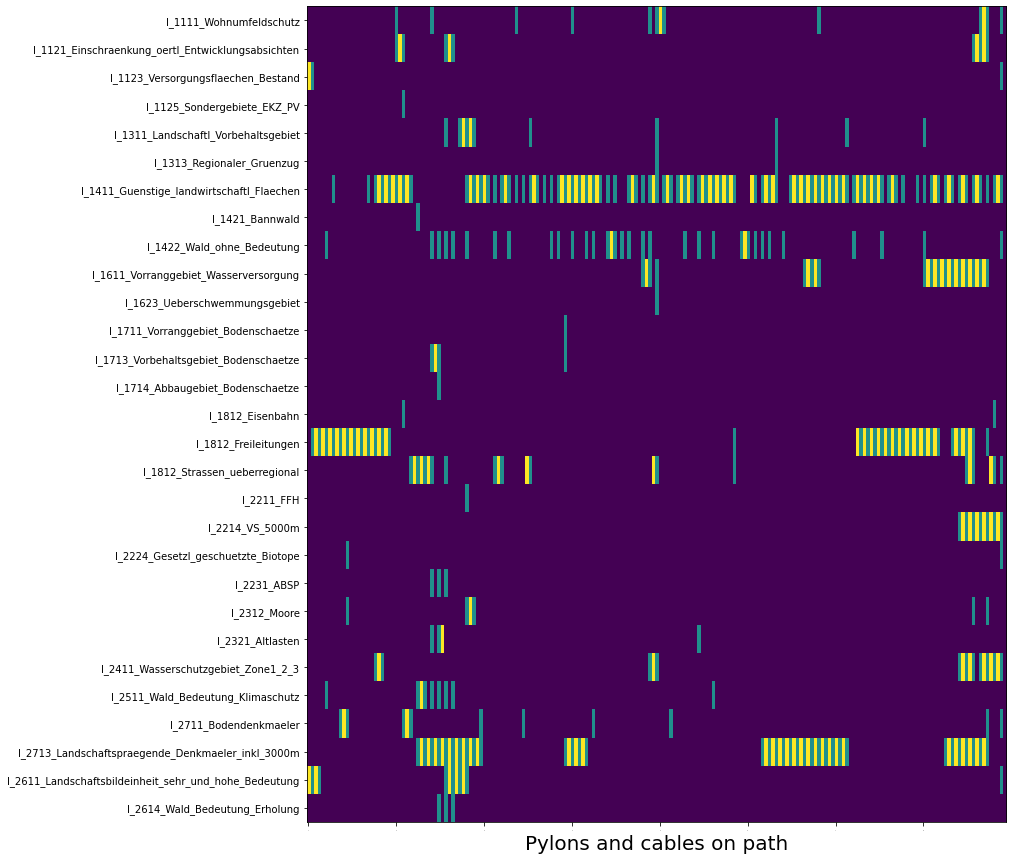

In [111]:
# OPTION 1: pylons and edges both as one field
path = path_list[0]
out_matrix = pylon_edge_matrix(arr, path)
# OPTION 2: all fields of cables seperately
# out_matrix = pylon_cable_matrix(arr, path)
# OPTION 3: simply take pylons, no cables considered
# out_matrix = pylon_matrix(arr, path)

# restrict to nonzero:
layer_labels = df["layer"].values[np.any(out_matrix, axis=1)]
out_matrix = out_matrix[np.any(out_matrix, axis=1)]
np.save("../../figure/pylon_cable_cost2.npy", out_matrix)

# PLOTTING
fig, ax = plt.subplots(figsize=(25,15))
ax.imshow(out_matrix)
ax.set_xticklabels([i for i in range(len(out_matrix[0]))], fontsize=1)
ax.set_yticklabels(layer_labels, fontsize=10)
# plt.xticks([i for i in range(len(is_pylon))])
plt.yticks([i for i in range(len(out_matrix))])
plt.xlabel("Pylons and cables on path", fontsize=20)
ax.set_aspect(aspect=8)
plt.savefig("../../figure/pylon_cable_cost2.png")
plt.show()

In [113]:
for layer in layer_labels:
    print(layer)

I_1111_Wohnumfeldschutz
I_1121_Einschraenkung_oertl_Entwicklungsabsichten
I_1123_Versorgungsflaechen_Bestand
I_1125_Sondergebiete_EKZ_PV
I_1311_Landschaftl_Vorbehaltsgebiet
I_1313_Regionaler_Gruenzug
I_1411_Guenstige_landwirtschaftl_Flaechen
I_1421_Bannwald
I_1422_Wald_ohne_Bedeutung
I_1611_Vorranggebiet_Wasserversorgung
I_1623_Ueberschwemmungsgebiet
I_1711_Vorranggebiet_Bodenschaetze
I_1713_Vorbehaltsgebiet_Bodenschaetze
I_1714_Abbaugebiet_Bodenschaetze
I_1812_Eisenbahn
I_1812_Freileitungen
I_1812_Strassen_ueberregional
I_2211_FFH
I_2214_VS_5000m
I_2224_Gesetzl_geschuetzte_Biotope
I_2231_ABSP
I_2312_Moore
I_2321_Altlasten
I_2411_Wasserschutzgebiet_Zone1_2_3
I_2511_Wald_Bedeutung_Klimaschutz
I_2711_Bodendenkmaeler
I_2713_Landschaftspraegende_Denkmaeler_inkl_3000m
I_2611_Landschaftsbildeinheit_sehr_und_hohe_Bedeutung
I_2614_Wald_Bedeutung_Erholung


## Test edge cost comutation

because of edge_inst?

In [60]:
def edge_costs(layer_arr, path, normed=False):
    edge_costs = []
    path_int = path.astype(int)
    for l in range(len(layer_arr)): 
        path_edges = []
        for p in range(len(path)-1):
            # get connection line between two paths
            line = bresenham_line(
                    path[p][0], path[p][1], path[p + 1][0], path[p + 1][1]
                )
            # take the mean of each segment
            path_edges.append(np.mean([layer_arr[l,i,j] for (i,j) in line[1:-1]]))
        edge_costs.append(np.sum(path_edges))
    print(edge_costs)
    return edge_costs

def compute_edge_costs(path, instance, class_weights):
    costs = []
    for p in range(len(path) - 1):
        point_list = bresenham_line(
            path[p][0], path[p][1], path[p + 1][0], path[p + 1][1]
        )
        costs.append(np.mean([np.sum(instance[:, i, j]*class_weights) for (i, j) in point_list[1:-1]]))
    return np.sum(costs)

In [50]:
from power_planner.utils.utils_costs import CostUtils

In [64]:
edge_inst = instance.copy()
edge_inst[:, instance_corr==0] = 1

In [67]:
class_weights = np.array([0.28571429, 0.35714286, 0.14285714, 0.21428571])
for name, path in zip(json_names, path_list):
    shifted_path = np.asarray(path) - shift_to_origin
    out = compute_edge_costs(shifted_path, edge_inst, class_weights)
    print(name, out)
    # out2 = edge_costs(instance, shifted_path)
    # print(np.sum(out* class_weights), np.sum(out2*class_weights))

impl_0e_3a.json 11.791903827345422
impl_2e_2a.json 9.635710067137667
impl_3e_0a.json 9.403328948897446


In [35]:
shift_to_origin = data.orig_start - start_inds 
normed_df = class_df.copy()
for name, path in zip(json_names,path_list):
    normed_df[(name.split(".")[0], "pylon_cost", "weighted")] = pylon_costs(instance, np.asarray(path) - shift_to_origin)
    normed_df[(name.split(".")[0], "cable_costs", "weighted")] = cable_costs(instance, np.asarray(path) - shift_to_origin)
    normed_df[(name.split(".")[0], "edge_costs", "weighted")] = edge_costs(instance, np.asarray(path) - shift_to_origin)
normed_df

class impl_0e_3a                                               \
             edge_costs            pylon_cost            cable_costs   
               absolute   weighted   absolute   weighted    absolute   
0   cultural   3.302372   0.552296        2.0   0.307692        75.0   
1      human   0.000000   0.000000        0.0   0.000000         0.0   
2   planning  56.659563  23.955485       75.0  21.360000      1221.0   
3  technical  22.352235  20.259899       28.0  18.827586       481.0   

              impl_2e_2a                                               \
              edge_costs            pylon_cost            cable_costs   
     weighted   absolute   weighted   absolute   weighted    absolute   
0   12.538462   4.191700   0.658255        3.0   0.461538        96.0   
1    0.000000   0.000000   0.000000        0.0   0.000000         0.0   
2  512.880000  53.626413  23.680036       78.0  20.080000      1182.0   
3  433.931034  16.285442  20.607938       24.0  19.655172       356.0   

              impl_3e_0a                                               \
              edge_costs            pylon_cost            cable_costs   
     weighted   absolute   weighted   absolute   weighted    absolute   
0   15.076923   4.306512   0.669866        3.0   0.461538        99.0   
1    0.000000   0.000000   0.000000        0.0   0.000000         0.0   
2  518.160000  65.650066  23.901265      105.0  17.760000      1409.0   
3  451.758621  24.736285  21.024836       33.0  18.931034       538.0   

               
               
     weighted  
0   15.384615  
1    0.000000  
2  518.240000  
3  455.206897

## backup

In [ ]:
weighted_edge_costs.append(np.sum(weighted_edges))
    summed_pylon_costs.append(np.sum(df_grouped["pylon_costs"].values))
    summed_edge_costs.append(np.sum(df_grouped["cable_costs"].values))
    c.append(class_name)
class_df = pd.DataFrame()
class_df["class"] = c
class_df["pylon_costs"] = summed_pylon_costs
class_df["weighted_pylon_costs"] = weighted_pylon_costs
class_df["cable_costs"] = summed_edge_costs
class_df["weighted_cable_costs"] = weighted_edge_costs
class_df

In [3]:
import numpy as np
probs = np.array([[4.588516950607299805e-01,8.313891291618347168e-02,2.021454572677612305e-01,6.570858880877494812e-03],[
2.414733171463012695e-01,9.140530228614807129e-02,4.274680316448211670e-01,5.915927886962890625e-02],[
2.414703220129013062e-01,9.140556305646896362e-02,4.274691343307495117e-01,5.915891379117965698e-02],[
2.414698004722595215e-01,9.140519797801971436e-02,4.274694323539733887e-01,5.915866047143936157e-02],[
2.246829718351364136e-01,1.350800395011901855e-01,3.887074291706085205e-01,6.396259367465972900e-02],[
2.266708910465240479e-01,1.342061161994934082e-01,3.891490101814270020e-01,6.347329169511795044e-02]])